# Projeto para aprender sobre formas de classificação e dados com muitas dimensões

### Importando dados

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
dados.shape

(569, 35)

In [5]:
##Muitos exames diferentes
dados.columns

Index(['id', 'diagnostico', 'exame_1', 'exame_2', 'exame_3', 'exame_4',
       'exame_5', 'exame_6', 'exame_7', 'exame_8', 'exame_9', 'exame_10',
       'exame_11', 'exame_12', 'exame_13', 'exame_14', 'exame_15', 'exame_16',
       'exame_17', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_24', 'exame_25', 'exame_26', 'exame_27', 'exame_28',
       'exame_29', 'exame_30', 'exame_31', 'exame_32', 'exame_33'],
      dtype='object')

In [6]:
#O exame 33 tem muitos dados nulos, cerca de 73%. Como é uma base pra estudo não sei o motivo, mas a minha
#hipotese é que é um exame muito custoso , por isso alguns casos ele não é exigido, só saberia dessa informação
#perguntando para o dono da base
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

### Tratando os missings

In [7]:
# como não sei como funciona a coluna, vou optar por excluir, se eu soubesse o motivo de estar zerado
# poderia inferir o valor com média de outras colunas ou então subistituir todos os valores nulos por um valor fixo
dados.drop(columns=['exame_33'], inplace=True)

### Estatistica Descritiva

In [8]:
cancer = {
    'M' : 1,
    'B' : 0
}

dados['cancer'] = dados.diagnostico.map(cancer)
dados.corr()[['cancer']].sort_values('cancer', ascending=False)

,cancer
cancer,1.000000
exame_30,0.793566
exame_24,0.782914
exame_9,0.776614
exame_22,0.776454
exame_3,0.742636
exame_25,0.733825
exame_1,0.730029
exame_5,0.708984
exame_8,0.696360


In [9]:
# A intenção não é usar nenhum modelo linear, mas podemos ver boas correlações entre alguns exames e já levantar algumas
# hipoteses de qual exame pode distinguir melhor o tipo de cancer
dados.drop(columns=['cancer'], inplace=True)

In [10]:
## Dando uma olhada no percentual do nosso evento com relação a população
dados.diagnostico.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnostico, dtype: float64

### Separando dados entre treino e teste

In [11]:
from sklearn.model_selection import train_test_split
from numpy import random

In [12]:
random.seed(123143)
x = dados.drop(columns=['id', 'diagnostico'])
y = dados['diagnostico']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Treinando o modelo

In [13]:
#Estou usando randomforest, é uma forma de aprender como o modelo funciona, não utilizei nenhum
#critério para escolher ele, é apenas uma forma de estudo para eu entender como ele funciona

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
#Ajustando o modelo
random.seed(123143)
modelo = RandomForestClassifier(n_estimators= 100)
modelo.fit(x_train, y_train)

# Acuracia média ficou muito boa, chega a estar estranho tal resultado (digo que é estranho pois
# trabalho com prevenção a fruade, e os modelos nunca ficam com resultados tão bons)
print(f"Acuracia média do modelo: {round(modelo.score(x_test, y_test)*100,2)}")

Acuracia média do modelo: 91.81


### Validando modelo contra um teste base

In [16]:
from sklearn.dummy import DummyClassifier

In [17]:
#Comparando com um teste base onde é chutado todos os valores pela variavel que mais aparece
random.seed(123143)

modelo_dummy = DummyClassifier(strategy = 'most_frequent')
modelo_dummy.fit(x_train, y_train)
print(f"Acuracia média do modelo dummy: {round(modelo_dummy.score(x_test, y_test)*100,2)}")

Acuracia média do modelo dummy: 66.67


In [18]:
## realmente o nosso modelo de classificação é bem melhor que um modelo que escolhemos para o teste base

### Analise exploratória a partir de Gráficos

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

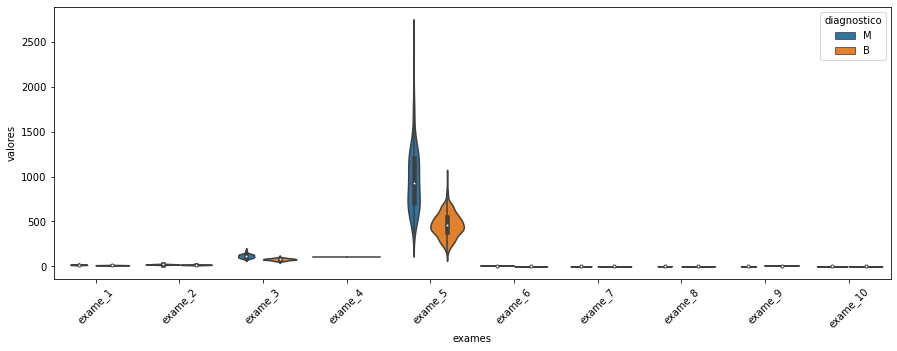

In [20]:
#ajustando dados para visualização
dados_plot = pd.concat([y, x.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
dados_plot.head()

#plotando
plt.figure(figsize = (15,5))
plt.xticks(rotation=45)
ax = sns.violinplot(x = 'exames', y = 'valores', hue='diagnostico', data=dados_plot)


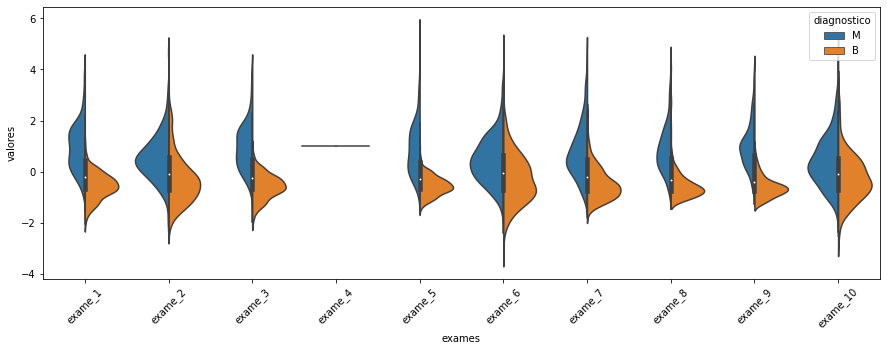

In [21]:
#Padronizando o eixo Y para uma melhor visualização
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(x)
dados_melhorados = padronizador.transform(x)
dados_melhorados = pd.DataFrame(data=dados_melhorados, columns=x.keys())

#ajustando dados para visualização
dados_plot = pd.concat([y, dados_melhorados.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
dados_plot.head()

#plotando
plt.figure(figsize = (15,5))
plt.xticks(rotation=45)
ax = sns.violinplot(x = 'exames', y = 'valores', hue='diagnostico', split=True, data=dados_plot)

In [22]:
# Vemos que alguns exames são muito bons para realizar essa separação, muito em linha com a correlação que vimos
# no começo do estudo. Porém o que chama a atenção é o exame 4, que é uma reta, vamos olhar ele mais a fundo

In [23]:
dados.exame_4
# Todos os dados são iguais, então na verdade o exame 4 não discrimina nada, ele é uma variavel constante.
# Podemos tirar ele das nossas analises, visto que não ajuda em nada

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

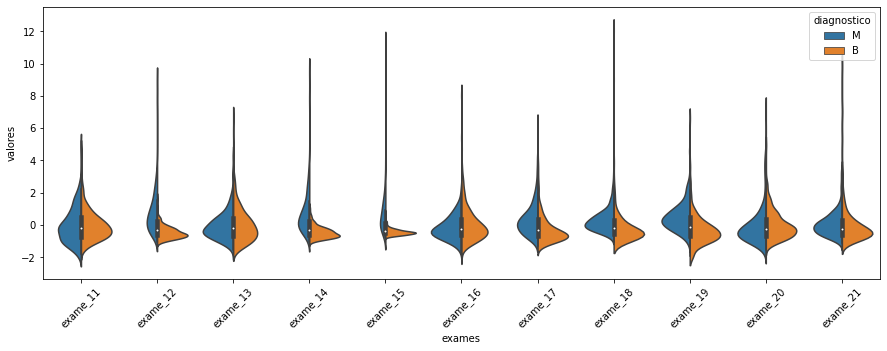

In [24]:
#Criando uma função pra plotar todos os exames
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([y, valores.iloc[:,inicio:fim]], axis=1)
    dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
    dados_plot.head()

    #plotando
    plt.figure(figsize = (15,5))
    plt.xticks(rotation=45)
    ax = sns.violinplot(x = 'exames', y = 'valores', hue='diagnostico', split=True, data=dados_plot)
    
grafico_violino(dados_melhorados, 10, 21)

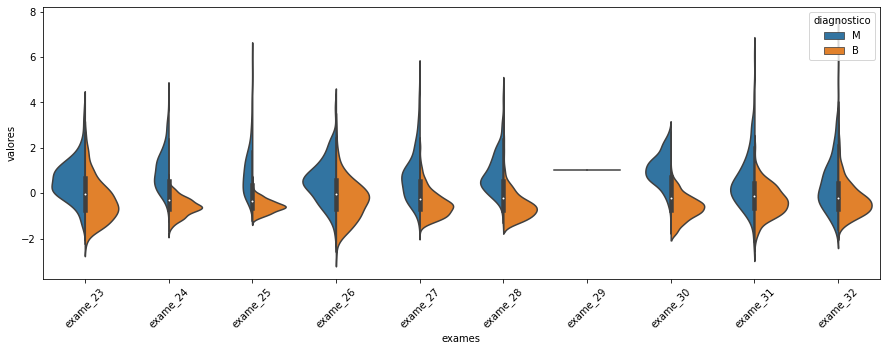

In [25]:
grafico_violino(dados_melhorados, 22, 32)

In [26]:
#Vemos então que temos mais variaveis continuas, vamos remove-las e rodar a classificação do modelo novamente

### Reajustando o modelo com os ajustes das variaveis

In [27]:
# Criar uma função que roda o modelo de classificação para simplificar
def classificar(valores):
    # Segmentando treino e teste
    random.seed(123143)

    x_train, x_test, y_train, y_test = train_test_split(valores, y, test_size=0.3)
    
    # Ajustando o modelo
    random.seed(123143)
    modelo = RandomForestClassifier(n_estimators= 100)
    modelo.fit(x_train, y_train)
    print(f"Acuracia média do modelo: {round(modelo.score(x_test, y_test)*100,2)}")

In [28]:
dados_melhorados_1 = dados_melhorados.drop(columns=['exame_4', 'exame_29'])
classificar(dados_melhorados_1)

Acuracia média do modelo: 92.98


In [29]:
# Tivemos um resultado melhor reduzindo a dimensão dos dados

### Voltando a analise exploratoria através de gráficos

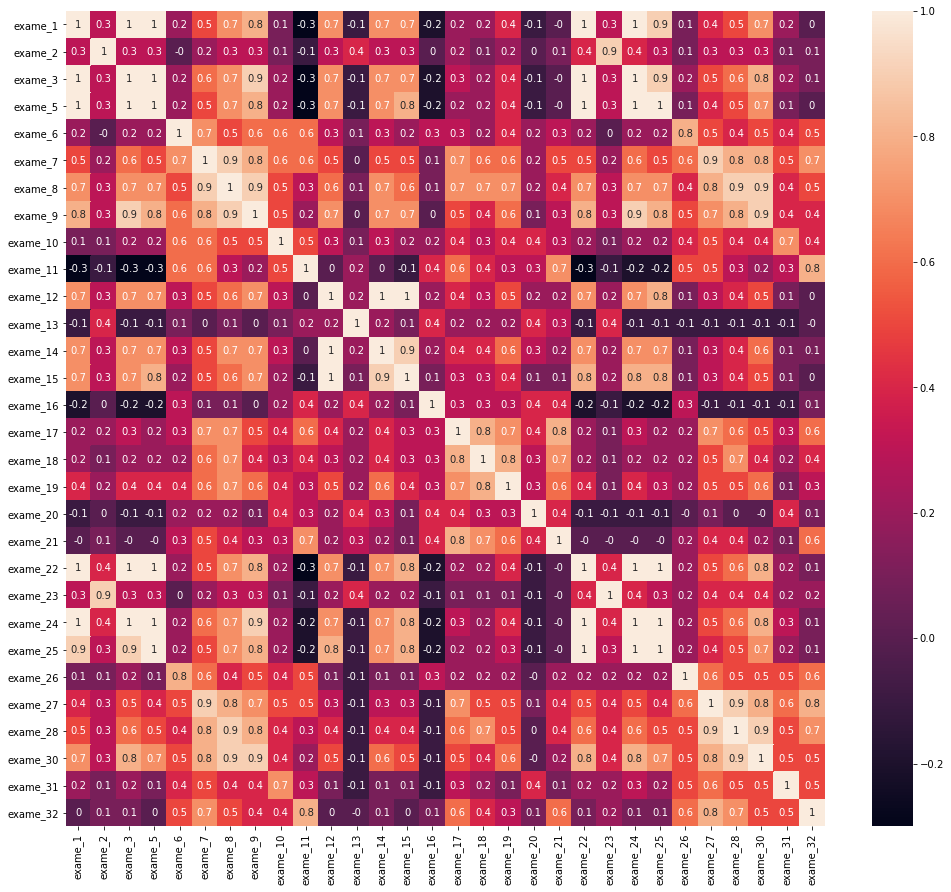

In [30]:
# Vamos olhar a correlação só que por um gráfico de calor para veririfar variaveis altamente correlacionadas entre si
matriz_corr = dados_melhorados_1.corr()

plt.figure(figsize=(17,15))
ax = sns.heatmap(matriz_corr.round(1), annot = True)

In [31]:
# Temos alguns exames que são muito correlacionados entre si, vamos avaliar aqueles que tem correlação >0.99
# e excluir algum entre eles

In [32]:
matriz_corr_v1 = matriz_corr[matriz_corr > 0.99]
matriz_corr_v2 = matriz_corr_v1.sum()
matriz_corr_v2.head()

exame_1    1.997855
exame_2    1.000000
exame_3    1.997855
exame_5    1.000000
exame_6    1.000000
dtype: float64

In [33]:
# Olhando tudo que é correlacionado entre si > 0.99
variaveis_correlacionadas = matriz_corr_v2[matriz_corr_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [34]:
# Vamos testar o modelo sem esses exames altamente correlacionados
dados_melhorados_2 = dados_melhorados_1.drop(columns = variaveis_correlacionadas.keys())
classificar(dados_melhorados_2)

Acuracia média do modelo: 92.98


In [35]:
# O modelo até melhorou de performance, mas não era isso que deveriamos ter feito, mas sim excluir 
# algumas entre elas. Por critério de ordem vamos deixar apenas o exame 1 e exame 22. Mas poderiamos
# usar outros critérios para decidir, se soubessemos os custos de cada exame, isso poderia entrar no peso da decisão
dados_melhorados_3 = dados_melhorados_1.drop(columns = ['exame_3', 'exame_24'])
classificar(dados_melhorados_3)

Acuracia média do modelo: 94.15


In [36]:
# Assim melhoramos o modelo e ainda tiramos algumas variaveis

### Selecionando as melhores features através de k-best

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kbest = SelectKBest(chi2, k = 5)

In [63]:
# Segmentando treino e teste, o kbest não funciona para valores negativos, então temos que voltar nossos dados que
# Estão padronizados para o normal
random.seed(123143)
dados_melhorados_4 = dados.drop(columns=["exame_4", 'exame_29', 'exame_3', 'exame_24', 'id', 'diagnostico'])
y = dados['diagnostico']

x_train, x_test, y_train, y_test = train_test_split(dados_melhorados_4, y, test_size=0.3)

# Ajustando dados
selecionar_kbest.fit(x_train, y_train)
train_kbest = selecionar_kbest.transform(x_train)
test_kbest = selecionar_kbest.transform(x_test)

In [73]:
# Então aqui selecionamos as 5 melhores variaveis para ai sim rodar o modelo, vamo seguir então rodando o random forest

Index(['exame_1', 'exame_5', 'exame_15', 'exame_22', 'exame_25'], dtype='object')

In [40]:
# Ajustando o modelo

random.seed(123143)
modelo_kbest = RandomForestClassifier(n_estimators= 100)
modelo_kbest.fit(train_kbest, y_train)
print(f"Acuracia média do modelo: {round(modelo_kbest.score(test_kbest, y_test)*100,2)}")

Acuracia média do modelo: 96.49


In [41]:
# Então com apenas 5 variaveis o nosso modelo ficou bem melhor que o modelo de inicio

### Analisando a performance do modelo

In [43]:
# Analisando através de uma matriz de confusão
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_test, modelo_kbest.predict(test_kbest))

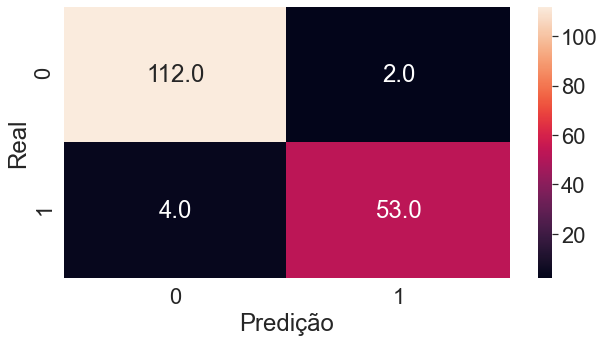

In [44]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot = True, fmt = '.1f').set(xlabel = 'Predição', ylabel='Real')


### Utilizando Recurssion Feature Selection

Acuracia média do modelo: 92.4


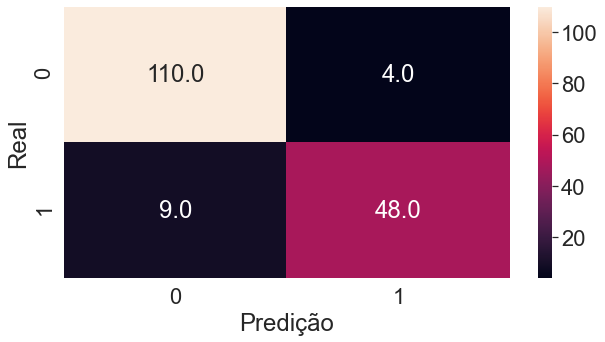

In [45]:
# Vamos utilizar o RFE para selecionar as melhores features
from sklearn.feature_selection import RFE

# Separando treino e teste
random.seed(123143)

dados_melhorados_4 = dados.drop(columns=["exame_4", 'exame_29', 'exame_3', 'exame_24', 'id', 'diagnostico'])
y = dados['diagnostico']
x_train, x_test, y_train, y_test = train_test_split(dados_melhorados_4, y, test_size=0.3)


# Ajustando modelo
modelo = RandomForestClassifier(n_estimators= 100)
modelo.fit(x_train, y_train)

selecionador_rfe = RFE(estimator = modelo, n_features_to_select= 5, step = 1)
selecionador_rfe.fit(x_train, y_train)
train_rfe = selecionador_rfe.transform(x_train)
test_rfe = selecionador_rfe.transform(x_test)

modelo.fit(train_rfe, y_train)

matriz_confusao = confusion_matrix(y_test, modelo.predict(test_rfe))
plt.figure(figsize=(10,5))
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot = True, fmt = '.1f').set(xlabel = 'Predição', ylabel='Real')
print(f"Acuracia média do modelo: {round(modelo.score(test_rfe, y_test)*100,2)}")

Acuracia média do modelo: 93.57


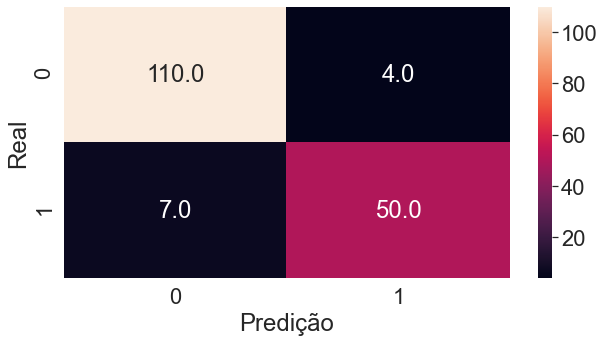

In [46]:
# Vamos utilizar o RFECV para selecionar as melhores features com o melhor número de features
from sklearn.feature_selection import RFECV

# Separando treino e teste
random.seed(123143)

dados_melhorados_4 = dados.drop(columns=["exame_4", 'exame_29', 'exame_3', 'exame_24', 'id', 'diagnostico'])
x_train, x_test, y_train, y_test = train_test_split(dados_melhorados_4, y, test_size=0.3)


# Ajustando modelo
modelo = RandomForestClassifier(n_estimators= 100)
modelo.fit(x_train, y_train)

selecionador_rfecv = RFECV(estimator = modelo, cv = 5, step = 1, scoring='accuracy')
selecionador_rfecv.fit(x_train, y_train)
train_rfecv = selecionador_rfecv.transform(x_train)
test_rfecv = selecionador_rfecv.transform(x_test)

modelo.fit(train_rfecv, y_train)

# plotando resultado
matriz_confusao = confusion_matrix(y_test, modelo.predict(test_rfecv))
plt.figure(figsize=(10,5))
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot = True, fmt = '.1f').set(xlabel = 'Predição', ylabel='Real')
print(f"Acuracia média do modelo: {round(modelo.score(test_rfecv, y_test)*100,2)}")

In [47]:
# Essas foram as variaveis seleceionadas

print(x_train.columns[selecionador_rfecv.support_])

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_11', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_17', 'exame_18', 'exame_19', 'exame_20', 'exame_21',
       'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28',
       'exame_30', 'exame_31', 'exame_32'],
      dtype='object')


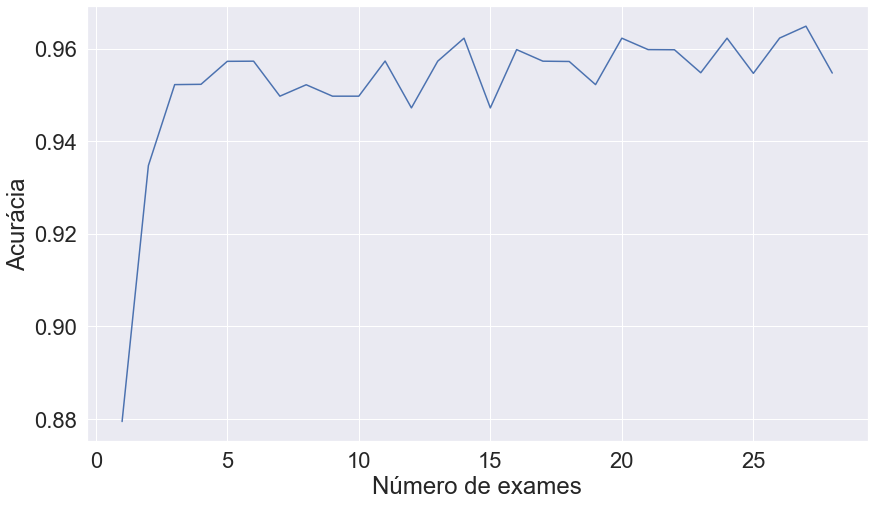

In [48]:
# Mostrando o resultado por quantidade de features
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.xlabel('Número de exames')
plt.ylabel('Acurácia')
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
plt.show()

In [49]:
# Vamos agora tentar visualizar os dados em um plano, então vamos utilizar o rfe para selecionar apenas 2 features, assim
# conseguimos olhar no plano

# Alterei la em cima para rodar o rfe com apenas 2 features
dados_melhorados_5 = selecionador_rfe.transform(dados_melhorados_4)
dados_melhorados_5.shape

(569, 5)

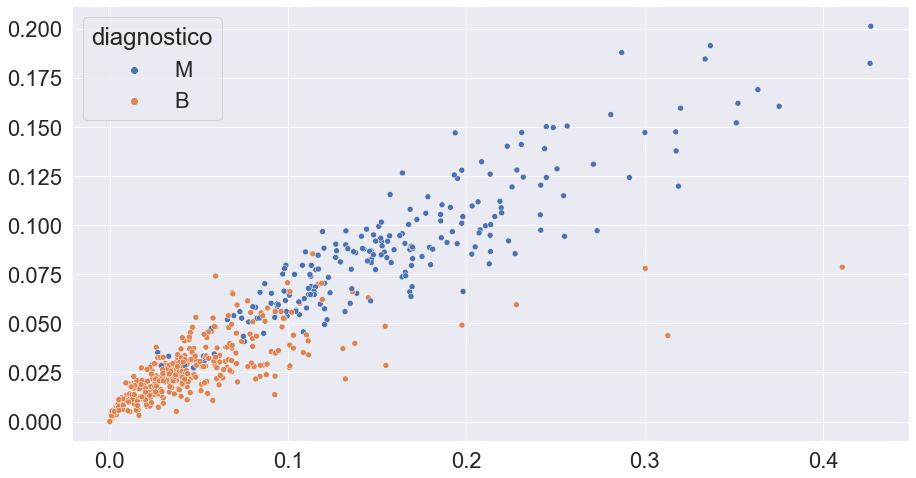

In [50]:
# Vamos plotar em 2 dimensões agora

plt.figure(figsize=(15,8))
ax = sns.scatterplot(x = dados_melhorados_5[:,0], y = dados_melhorados_5[:,1], hue=y)

In [51]:
# Nós perdemos muito na visualização aqui, pois estamos reduzindo 30 variaveis em apenas 2

In [52]:
# Vamos então através do PCA tentar resumir os dados em 2 dimensões para melhor visualização

### PCA

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
dados_melhorados_6 = pca.fit_transform(dados_melhorados_3)
dados_melhorados_6

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148886],
       [ 5.24751143, -1.46792043],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

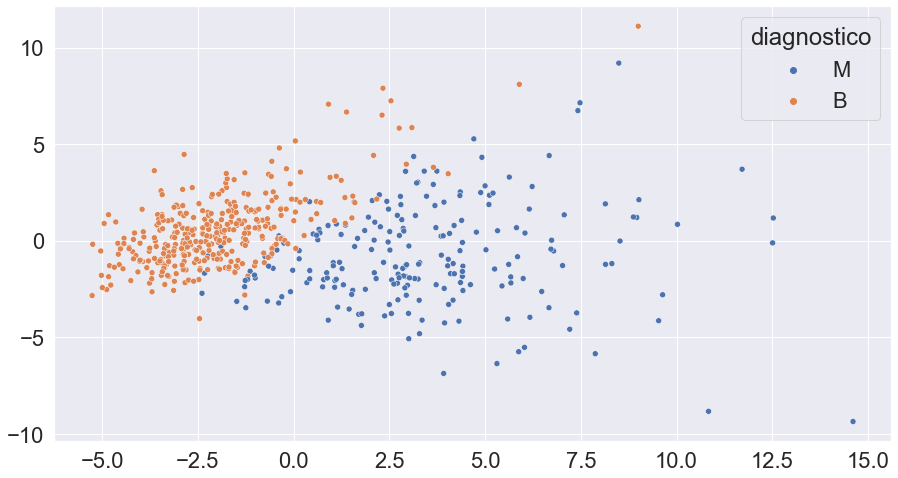

In [54]:
# Vamos plotar em 2 dimensões agora

plt.figure(figsize=(15,8))
ax = sns.scatterplot(x = dados_melhorados_6[:,0], y = dados_melhorados_6[:,1], hue=y)

In [55]:
# Mas ainda existe um metodo melhor para mostrar de forma mais real e clara a distancia entre esses pontos
# que éo TSNE

### TSNE

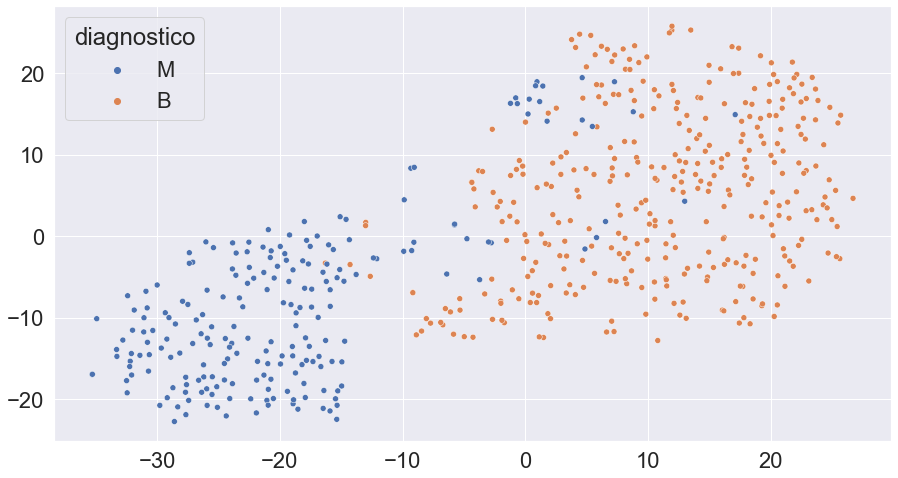

In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
dados_melhorados_7 = tsne.fit_transform(dados_melhorados_3)
dados_melhorados_7

plt.figure(figsize=(15,8))
ax = sns.scatterplot(x = dados_melhorados_7[:,0], y = dados_melhorados_7[:,1], hue=y)

In [57]:
# então agora temos essa "fronteira" mais clara, e as pessoas que estão nessa divisão, onde o diagnostico a partir dos
# exames selecionados pelo modelo fiquem nessa região, nos podemos pedir para que façam mais exames
# para ter um diagnóstico melhorado

In [58]:
# por fim olhando todos os modelos que analisamos apenas pela acuracia, podemos dizer que o k-best
# foi o que teve um melhor resultado, então se o critério de decisão fosse apenas por essa métrica
# utilizariamos o k-best 

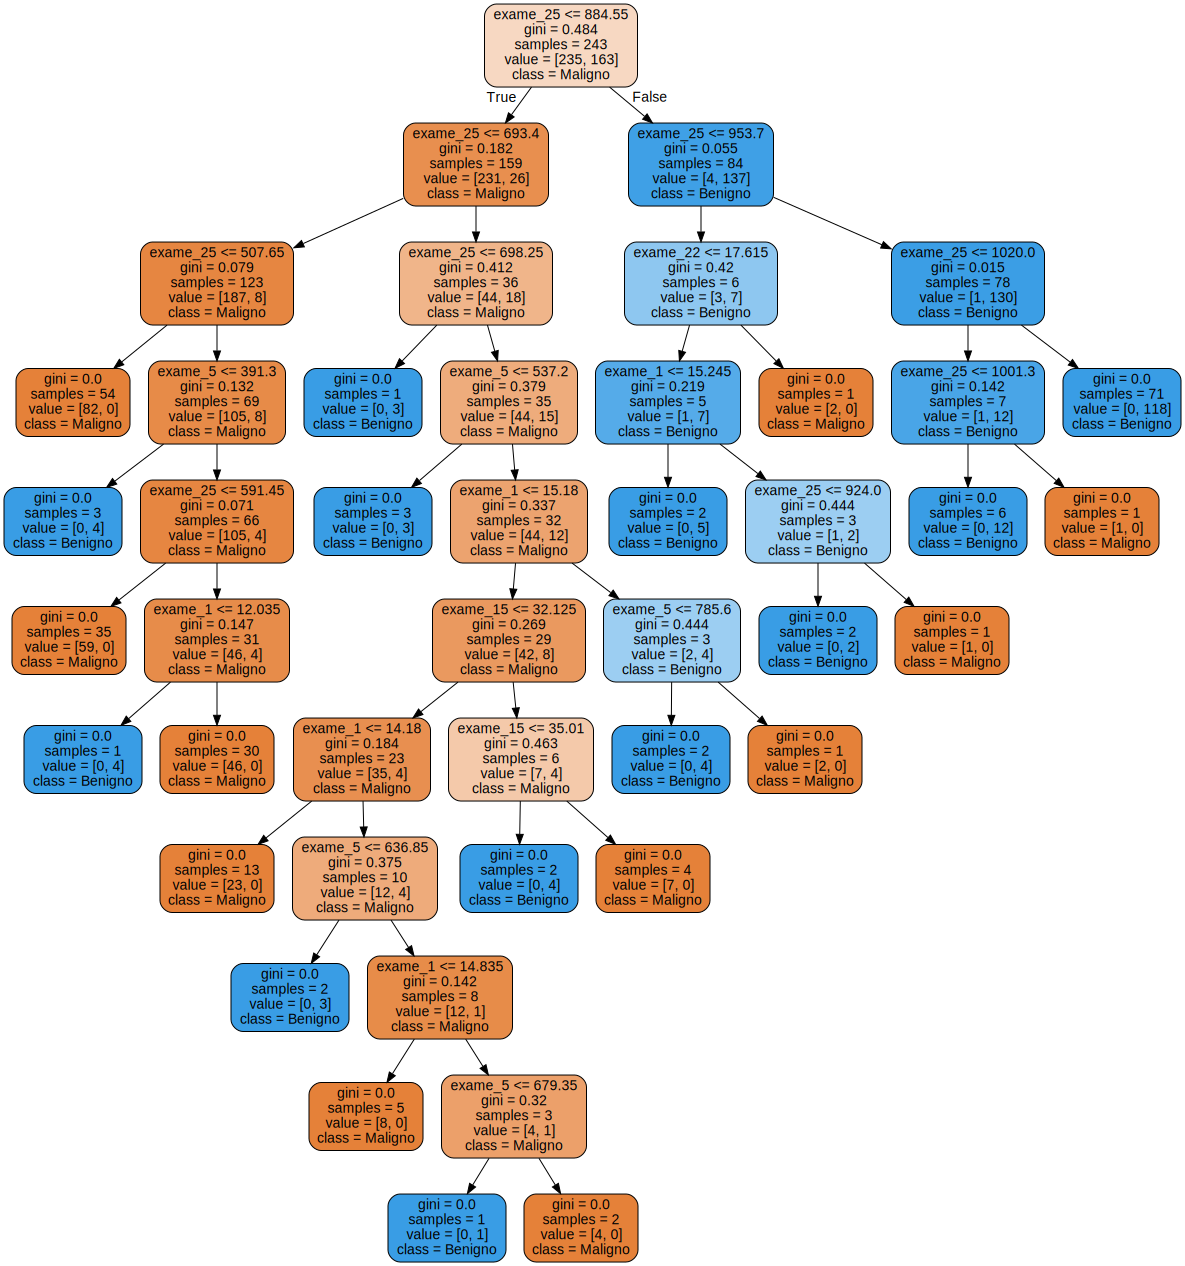

In [81]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo_kbest.estimators_[99], out_file=None,
                           filled=True, rounded=True,
                          feature_names = dados_melhorados_4.columns[selecionar_kbest.get_support()],
                          class_names = ['Maligno', 'Benigno'])
grafico = graphviz.Source(dot_data)
grafico